(256, 342, 3)


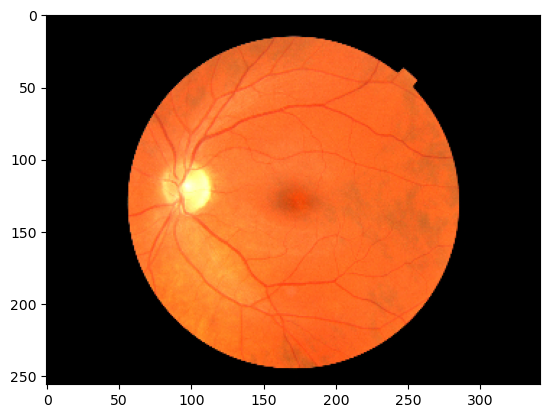

In [1]:
# Read a small portion of fundus eye images and save them for quick loading later
# Save the subjects from these saved fundus images
# Save about 7000 images (10-13)
# More like 5000 images (10-14)
# 7000 images * 1536 * 2048 * 3 * 4 bytes
# 7000 images * 256 * 342 * 3 * 4 bytes = 7GB acceptable
# Need to lower resolution
# Have 12001 subs from batches 10-18 (inclusive)

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

loc = '/run/media/anton/Elements/UKB/21015/Bulk/Retinal Optical Coherence Tomography/Fundus (left)/'

img = mpimg.imread(f'{loc}/10/1000080_21015_0_0.png')
img = img[::6,::6]

print(img.shape)
plt.imshow(img)

In [2]:
print(img.dtype)

float32


In [3]:
# Memory leak of larger image size, need to do one batch at a time

from pathlib import Path
import re
import numpy as np

count = 0
fundi = dict()
empty = dict()

for batch in ['18']:
    for ent in Path(f'{loc}/{batch}').iterdir():
        mtch = re.match('(\\d+)_21015_0_0\\.png', ent.name)
        if mtch is not None:
            sub = mtch.group(1)
            img = mpimg.imread(str(ent))
            img = img[::6,::6]
            if img.shape != (256, 342, 3):
                print(f'Bad {sub} {img.shape}')
                continue
            if np.sum(img < 0.05) > 220000:
                print(f'Empty image {sub}')
                empty[sub] = img
                continue
            fundi[sub] = img
            count += 1
            if count % 50 == 0:
                print(f'Done {count} {ent.name}')

print(len(fundi))

Empty image 1899673
Empty image 1870079
Done 50 1819968_21015_0_0.png
Done 100 1851658_21015_0_0.png
Empty image 1810726
Done 150 1877834_21015_0_0.png
Empty image 1859512
Empty image 1815105
Done 200 1841846_21015_0_0.png
Empty image 1892014
Done 250 1824685_21015_0_0.png
Done 300 1856080_21015_0_0.png
Empty image 1832988
Done 350 1897427_21015_0_0.png
Done 400 1817987_21015_0_0.png
Empty image 1808680
Done 450 1867236_21015_0_0.png
Empty image 1839552
Done 500 1826962_21015_0_0.png
Empty image 1823457
Done 550 1827905_21015_0_0.png
Done 600 1884870_21015_0_0.png
Empty image 1885471
Done 650 1815733_21015_0_0.png
Done 700 1855082_21015_0_0.png
Done 750 1895466_21015_0_0.png
Done 800 1806788_21015_0_0.png
Done 850 1876819_21015_0_0.png
Done 900 1843541_21015_0_0.png
Done 950 1882636_21015_0_0.png
Done 1000 1813439_21015_0_0.png
Done 1050 1865645_21015_0_0.png
Done 1100 1886609_21015_0_0.png
Done 1150 1893952_21015_0_0.png
Empty image 1804476
Done 1200 1826719_21015_0_0.png
Empty image 

238214
230935
224590
258731
260443
252631
253626
224425


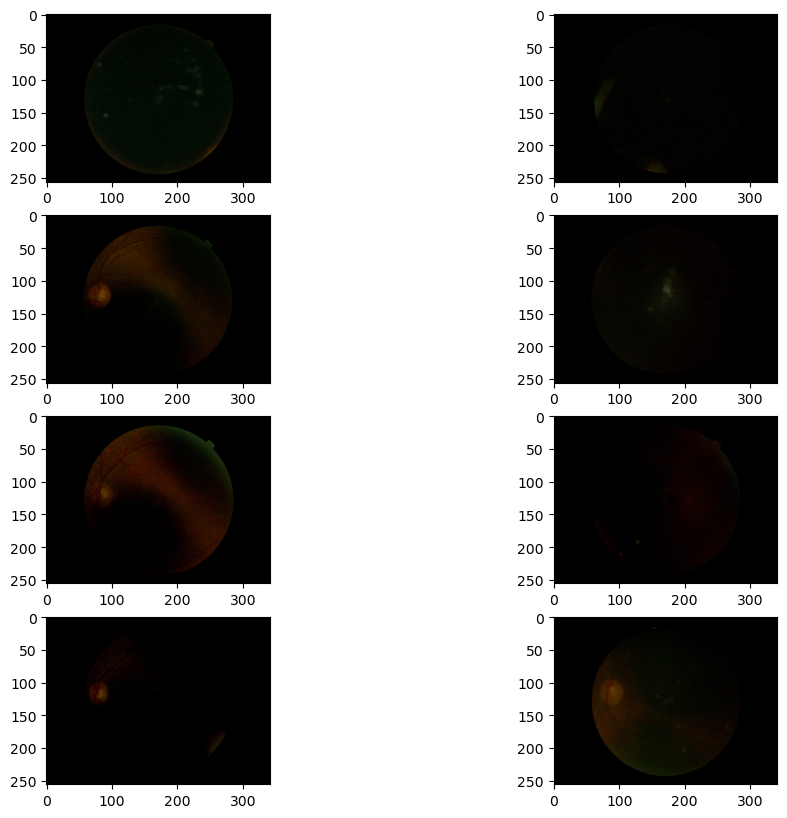

In [4]:
import numpy as np
import math

fig, ax = plt.subplots(4,2,figsize=(12,10))

for i,sub in enumerate(empty.keys()):
    img = empty[sub]
    print(np.sum(img < 0.05))
    r = i % 4
    c = math.floor(i/4)
    ax[r,c].imshow(img)
    if i >= 7:
        break

177370
139388
158195
138487
139213
140561
170860
151840


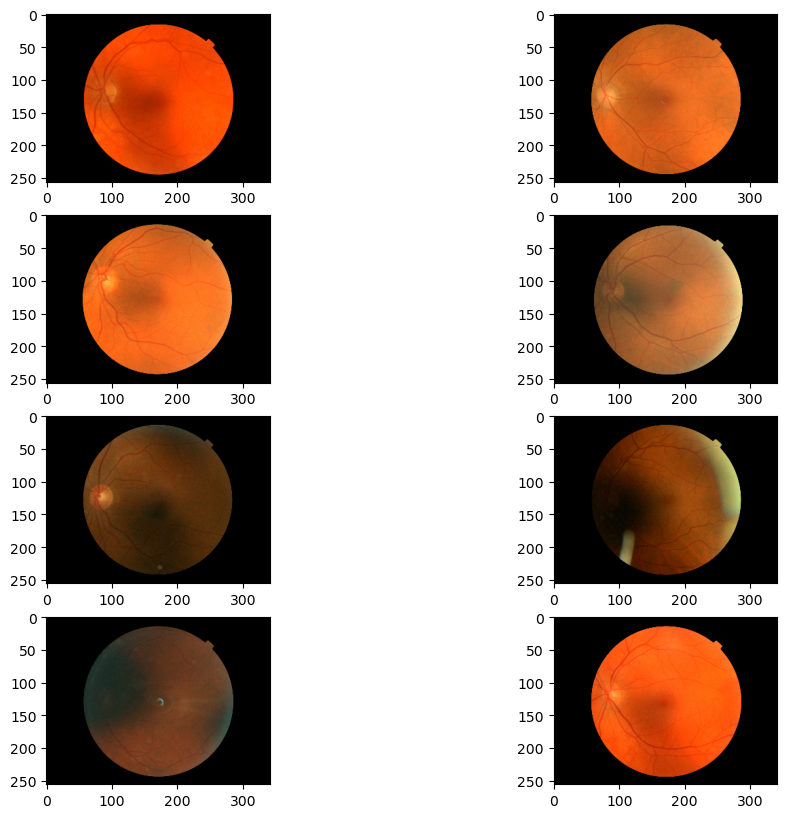

In [5]:
import numpy as np
import math

fig, ax = plt.subplots(4,2,figsize=(12,10))

for i,sub in enumerate(fundi.keys()):
    img = fundi[sub]
    print(np.sum(img < 0.05))
    r = i % 4
    c = math.floor(i/4)
    ax[r,c].imshow(img)
    if i >= 7:
        break

In [6]:
import pickle

pickle.dump(fundi, open(f'/run/media/anton/Elements/UKB/21015/{batch}.pkl', 'wb'))

print('Done')

Done


In [1]:
# Read and save subjects for fundus

import pickle

subs = set()

for batch in range(10,19):
    fundi = pickle.load(open(f'/run/media/anton/Elements/UKB/21015/{batch}.pkl', 'rb'))
    for sub in fundi.keys():
        subs.add(sub)

subs = sorted(list(subs))
print(len(subs))
print(subs[:10])

12001
['1000080', '1000140', '1000309', '1000364', '1000457', '1000522', '1000550', '1000576', '1000653', '1000667']


In [2]:
with open('/run/media/anton/Elements/UKB/21015/subs.txt', 'w') as f:
    for i,sub in enumerate(subs):
        f.write(sub + '\n')
        if i % 500 == 0:
            print(f'Done {i}')

print('Done')

Done 0
Done 500
Done 1000
Done 1500
Done 2000
Done 2500
Done 3000
Done 3500
Done 4000
Done 4500
Done 5000
Done 5500
Done 6000
Done 6500
Done 7000
Done 7500
Done 8000
Done 8500
Done 9000
Done 9500
Done 10000
Done 10500
Done 11000
Done 11500
Done 12000
Done
